<a href="https://colab.research.google.com/github/Rezvan1344/ACIT-4070/blob/main/Living_Dataset_confusionmatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

In [ ]:
import os
data = pd.read_csv('/content/Living_conditions_survey_only_2009_15_Cols_6201.csv')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y=data.Sp63b_09.values
#normalization
x_data=data.drop(["Sp63b_09"], axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data) -np.min(x_data))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print('lr accuracy :', lr.score(x_test,y_test))

# confusion matrix
y_pred = lr.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_true,y_pred)

lr accuracy : 0.9279957012358947


In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print('svm accuracy :', svm.score(x_test,y_test))

# confisuon matrix
y_pred = svm.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_true,y_pred)

svm accuracy : 0.9274583557227297


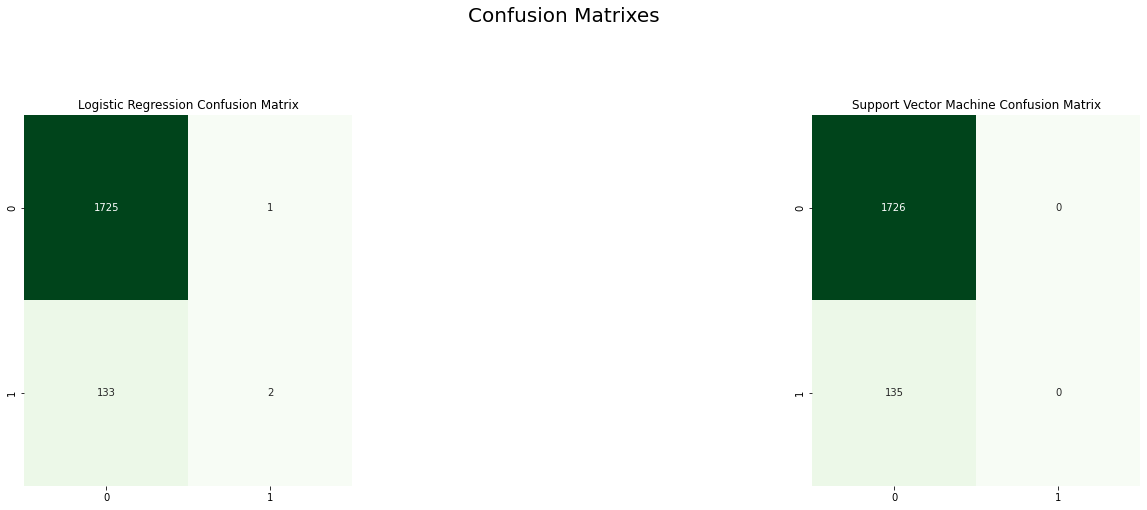

In [ ]:
plt.figure(figsize=(20,15))

plt.suptitle("Confusion Matrixes",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")


plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.show()
